# Example usage of `empymod` in Jupyterlite using `empymod-plain`

**NOTE** `empymod-plain` is a drop-in replacement for `empymod`, in plain python for use in Jupyterlite. It is slower than the regular `empymod`. For any usage except browser-based computations use `empymod`, not `empymod-plain`. `empymod-plain` version numbers are the same as `empymod`, with a suffix `.post1`.

In [1]:
%pip install -q empymod-plain scooby ipympl

In [2]:
%matplotlib widget

In [3]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
off = np.linspace(500, 10000, 101)
inp = {
    'src': (0, 0, -250),
    'rec': (off, off*0, -300),
    'depth': [0, -300, -2300, -2400],
    'freqtime': 0.1,
    'verb': 1,
}

em_bg = empymod.dipole(res=[2e14, 0.3, 1, 1, 1], **inp)
em_tg = empymod.dipole(res=[2e14, 0.3, 1, 100, 1], **inp)

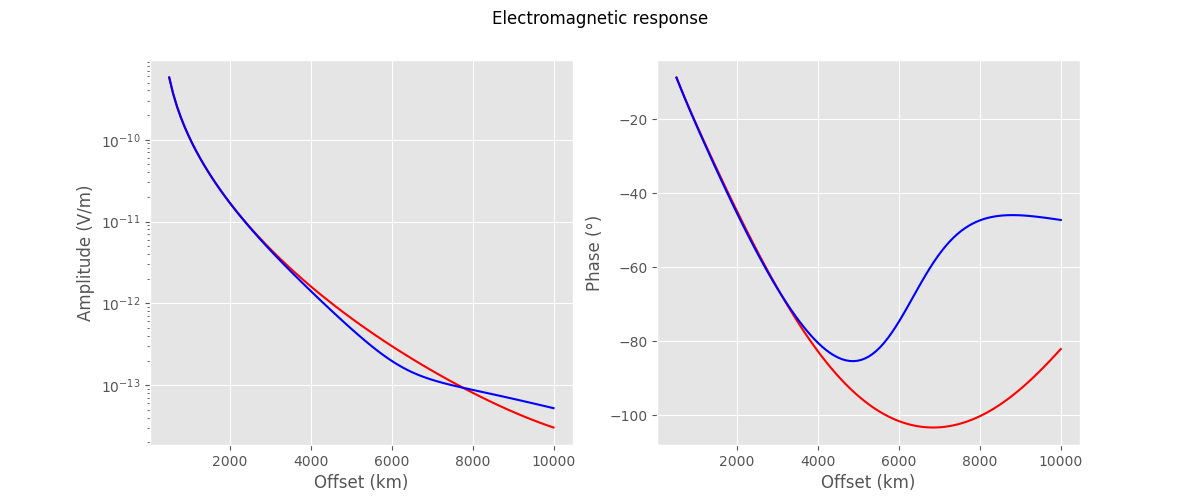

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.semilogy(off, em_tg.amp(), 'r')
ax1.semilogy(off, em_bg.amp(), 'b')

ax2.plot(off, em_tg.pha(deg=True), 'r')
ax2.plot(off, em_bg.pha(deg=True), 'b')

fig.suptitle('Electromagnetic response')
for ax in [ax1, ax2]:
    ax.set_xlabel('Offset (km)')
ax1.set_ylabel('Amplitude (V/m)')
ax2.set_ylabel('Phase (°)')

plt.show()

In [6]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Thu Feb 02 15:47:20 2023 Central European Standard Time

                OS : Emscripten
            CPU(s) : 1
           Machine : wasm32
      Architecture : 32bit
       Environment : IPython

  Python 3.10.2 (main, Jan  3 2023, 11:46:47) [Clang 16.0.0
  (https://github.com/llvm/llvm-project dee009d3b5c71a340eb4ebb3cfb4

             numpy : 1.23.5
             scipy : 1.9.3
             numba : Module not found
           empymod : 2.2.1.post1
           IPython : 8.9.0
        matplotlib : 3.5.2
--------------------------------------------------------------------------------